In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# !pip install ipdb

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
from envs import KeyRoom
import env_wrappers as wrappers
import minigrid
from pprint import pprint

pygame 2.5.2 (SDL 2.28.3, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


train
['blue key', 'green key', 'grey key', 'purple key']
transfer
['purple box', 'blue box', 'green box', 'grey box']
----------
Task: keys


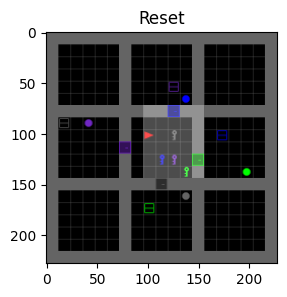

In [9]:
from pprint import pprint
env = KeyRoom(room_size=7, num_dists=0, fixed_door_locs=False, train_task_option=0, transfer_task_option=3)

name_fn = lambda o: f"{o.color} {o.type}"
# pprint(env._train_tasks)
print("train")
pprint([name_fn(o) for o in env._train_objects])
print("transfer")
pprint([name_fn(o) for o in env._transfer_objects])
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
# Create a figure and axis for plotting
fig, ax = plt.subplots(1,1, figsize=(3,3))

obs, info = env.reset()
ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
ax.set_title(f"Reset")

from envs import TaskOptions
print("-"*10)
print("Task:", TaskOptions(env.task_option).name)

21: reward: 1.0
terminated: False
truncated: False


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


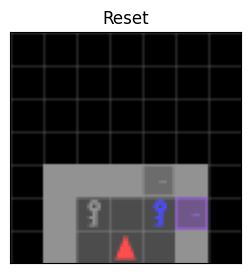

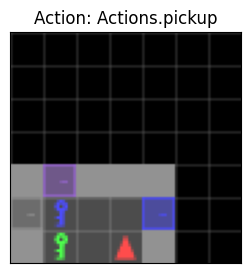

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


199: reward: 0.0
terminated: True
truncated: True
done


In [56]:
def prep_ax(ax):
    ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
env = KeyRoom(room_size=5, num_dists=0, fixed_door_locs=True, train_task_option=0, transfer_task_option=0)
env = minigrid.wrappers.DictObservationSpaceWrapper(env)
# env = wrappers.GotoOptionsWrapper(env)
# env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
env = minigrid.wrappers.RGBImgPartialObsWrapper(env, tile_size=12)

# Create a figure and axis for plotting
fig, ax = plt.subplots(1,1, figsize=(3,3))

obs, info = env.reset()
prep_ax(ax)
ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
ax.set_title(f"Reset")



for t in range(1000):
    # actions = list(range(info['nactions']))
    # print(t, "="*10, f'{len(actions)} actions', "="*10)
    # possible_actions = info['actions']
    # pprint(possible_actions)
    # pprint(env.prior_visible_objects)
    action = random.choice(actions)
    # print(f"Action taken {action}:", info['actions'][action])
    obs, reward, done, truncated, info = env.step(action)
    if reward > 0 or done:
        print(f"{t}: reward: {reward}")
        print(f"terminated: {done}")
        print(f"truncated: {truncated}")
        if done: break
    
        # Extract the image from the observation
        image = obs['image']
        
        # Display the image with the action as the title
        fig, ax = plt.subplots(1,1, figsize=(3,3))
        prep_ax(ax)
        ax.imshow(image)  # Assuming image has shape (C, H, W)
        ax.set_title(f"Action: {str(possible_actions[action])}")
    
        plt.show()
        plt.pause(0.1)  # Pause for a moment to display the image

print('done')
# Close the plot window at the end
plt.close()

In [28]:
info['actions']

{0: <Actions.left: 0>,
 1: <Actions.right: 1>,
 2: <Actions.forward: 2>,
 3: <Actions.pickup: 3>,
 4: <Actions.drop: 4>,
 5: <Actions.toggle: 5>,
 6: 'go to blue key'}

[3 0 2 1]
255 0 uint8
255 0 uint8


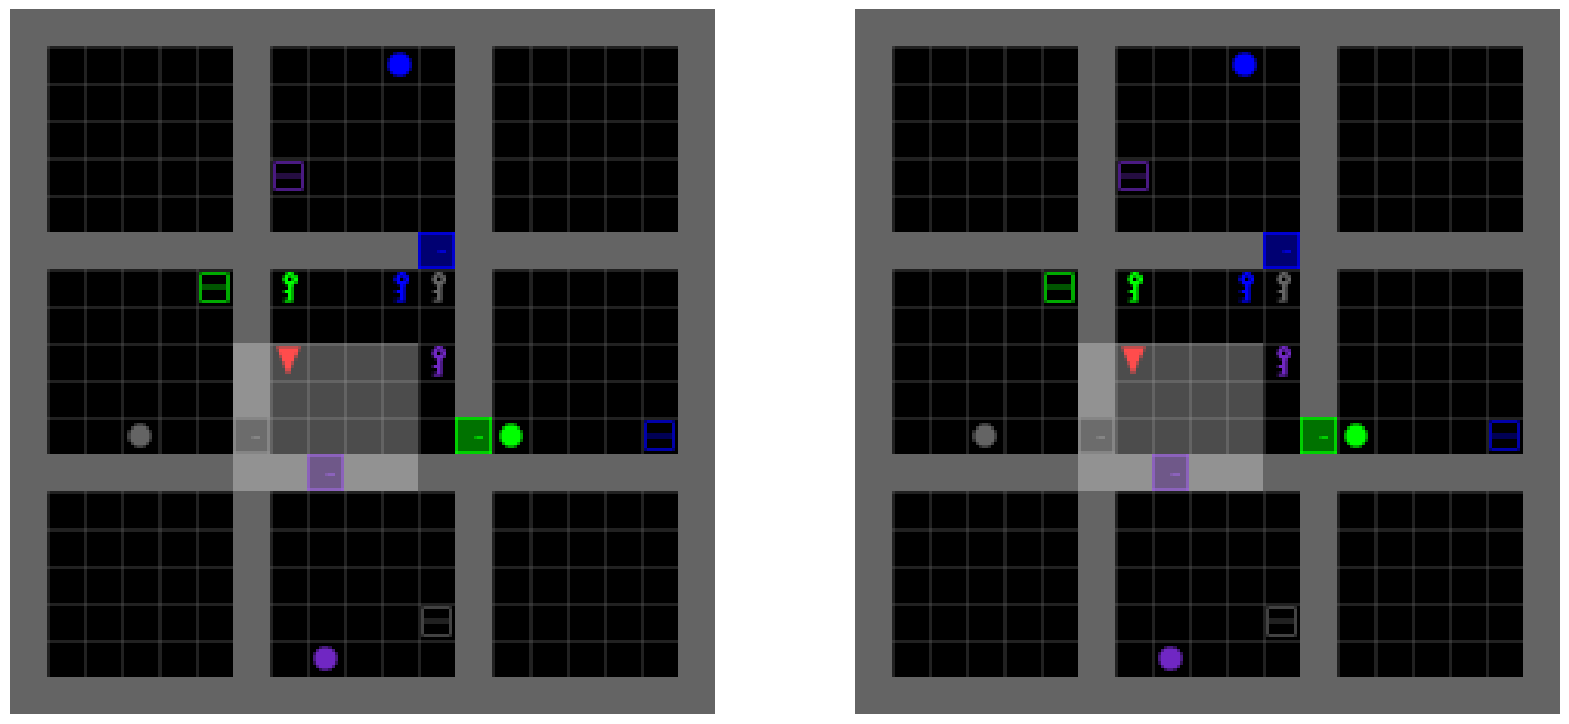

In [136]:
env = KeyRoom(num_dists=0, fixed_door_locs=False)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
visualize_random_actions(env, n=1)